In [1]:
import pandas as pd
import seaborn as sns
import numpy as np
import matplotlib.pyplot as plt

In [2]:
df=pd.read_csv("Uber.csv")

In [3]:
df.shape

(200000, 9)

In [4]:
df.head()


,Unnamed: 0,key,fare_amount,pickup_datetime,pickup_longitude,pickup_latitude,dropoff_longitude,dropoff_latitude,passenger_count
0,24238194,2015-05-07 19:52:06,7.5,2015-05-07 19:52:06 UTC,-73.999817,40.738354,-73.999512,40.723217,1
1,27835199,2009-07-17 20:04:56,7.7,2009-07-17 20:04:56 UTC,-73.994355,40.728225,-73.994710,40.750325,1
2,44984355,2009-08-24 21:45:00,12.9,2009-08-24 21:45:00 UTC,-74.005043,40.740770,-73.962565,40.772647,1
3,25894730,2009-06-26 08:22:21,5.3,2009-06-26 08:22:21 UTC,-73.976124,40.790844,-73.965316,40.803349,3
4,17610152,2014-08-28 17:47:00,16.0,2014-08-28 17:47:00 UTC,-73.925023,40.744085,-73.973082,40.761247,5


In [5]:
df.describe()

,Unnamed: 0,fare_amount,pickup_longitude,pickup_latitude,dropoff_longitude,dropoff_latitude,passenger_count
count,2.000000e+05,200000.000000,200000.000000,200000.000000,199999.000000,199999.000000,200000.000000
mean,2.771250e+07,11.359955,-72.527638,39.935885,-72.525292,39.923890,1.684535
std,1.601382e+07,9.901776,11.437787,7.720539,13.117408,6.794829,1.385997
min,1.000000e+00,-52.000000,-1340.648410,-74.015515,-3356.666300,-881.985513,0.000000
25%,1.382535e+07,6.000000,-73.992065,40.734796,-73.991407,40.733823,1.000000
50%,2.774550e+07,8.500000,-73.981823,40.752592,-73.980093,40.753042,1.000000
75%,4.155530e+07,12.500000,-73.967153,40.767158,-73.963659,40.768001,2.000000
max,5.542357e+07,499.000000,57.418457,1644.421482,1153.572603,872.697628,208.000000


In [6]:
df.isnull()

,Unnamed: 0,key,fare_amount,pickup_datetime,pickup_longitude,pickup_latitude,dropoff_longitude,dropoff_latitude,passenger_count
0,False,False,False,False,False,False,False,False,False
1,False,False,False,False,False,False,False,False,False
2,False,False,False,False,False,False,False,False,False
3,False,False,False,False,False,False,False,False,False
4,False,False,False,False,False,False,False,False,False
...,...,...,...,...,...,...,...,...,...
199995,False,False,False,False,False,False,False,False,False
199996,False,False,False,False,False,False,False,False,False
199997,False,False,False,False,False,False,False,False,False
199998,False,False,False,False,False,False,False,False,False


In [7]:
df.dtypes

Unnamed: 0             int64
key                   object
fare_amount          float64
pickup_datetime       object
pickup_longitude     float64
pickup_latitude      float64
dropoff_longitude    float64
dropoff_latitude     float64
passenger_count        int64
dtype: object

In [8]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 200000 entries, 0 to 199999
Data columns (total 9 columns):
 #   Column             Non-Null Count   Dtype  
---  ------             --------------   -----  
 0   Unnamed: 0         200000 non-null  int64  
 1   key                200000 non-null  object 
 2   fare_amount        200000 non-null  float64
 3   pickup_datetime    200000 non-null  object 
 4   pickup_longitude   200000 non-null  float64
 5   pickup_latitude    200000 non-null  float64
 6   dropoff_longitude  199999 non-null  float64
 7   dropoff_latitude   199999 non-null  float64
 8   passenger_count    200000 non-null  int64  
dtypes: float64(5), int64(2), object(2)
memory usage: 13.7+ MB


In [9]:
df.isnull.sum()

AttributeError: 'function' object has no attribute 'sum'

In [10]:
df.isnull.sum

AttributeError: 'function' object has no attribute 'sum'

In [11]:
df.isnull().sum()

Unnamed: 0           0
key                  0
fare_amount          0
pickup_datetime      0
pickup_longitude     0
pickup_latitude      0
dropoff_longitude    1
dropoff_latitude     1
passenger_count      0
dtype: int64

In [14]:
df['dropoff_longitude'].fillna(value=df['dropoff_longitude'].mean(),inplace=True)

In [15]:
df['dropoff_latitude'].fillna(value=df['dropoff_latitude'].mean(),inplace = True)


In [16]:
df.isnull().sum()

Unnamed: 0           0
key                  0
fare_amount          0
pickup_datetime      0
pickup_longitude     0
pickup_latitude      0
dropoff_longitude    0
dropoff_latitude     0
passenger_count      0
dtype: int64

In [17]:
df.pickup_datetime=pd.to_datetime(df.pickup_datetime,errors='coerce')

In [19]:
df.dtypes

Unnamed: 0                         int64
key                               object
fare_amount                      float64
pickup_datetime      datetime64[ns, UTC]
pickup_longitude                 float64
pickup_latitude                  float64
dropoff_longitude                float64
dropoff_latitude                 float64
passenger_count                    int64
dtype: object

In [20]:
df= df.assign(hour = df.pickup_datetime.dt.hour,
             day= df.pickup_datetime.dt.day,
             month = df.pickup_datetime.dt.month,
             year = df.pickup_datetime.dt.year,
             dayofweek = df.pickup_datetime.dt.dayofweek)

In [21]:
df.head()

,Unnamed: 0,key,fare_amount,pickup_datetime,pickup_longitude,pickup_latitude,dropoff_longitude,dropoff_latitude,passenger_count,hour,day,month,year,dayofweek
0,24238194,2015-05-07 19:52:06,7.5,2015-05-07 19:52:06+00:00,-73.999817,40.738354,-73.999512,40.723217,1,19,7,5,2015,3
1,27835199,2009-07-17 20:04:56,7.7,2009-07-17 20:04:56+00:00,-73.994355,40.728225,-73.994710,40.750325,1,20,17,7,2009,4
2,44984355,2009-08-24 21:45:00,12.9,2009-08-24 21:45:00+00:00,-74.005043,40.740770,-73.962565,40.772647,1,21,24,8,2009,0
3,25894730,2009-06-26 08:22:21,5.3,2009-06-26 08:22:21+00:00,-73.976124,40.790844,-73.965316,40.803349,3,8,26,6,2009,4
4,17610152,2014-08-28 17:47:00,16.0,2014-08-28 17:47:00+00:00,-73.925023,40.744085,-73.973082,40.761247,5,17,28,8,2014,3


In [22]:
df.describe

<bound method NDFrame.describe of         Unnamed: 0                  key  fare_amount  \
0         24238194  2015-05-07 19:52:06          7.5   
1         27835199  2009-07-17 20:04:56          7.7   
2         44984355  2009-08-24 21:45:00         12.9   
3         25894730  2009-06-26 08:22:21          5.3   
4         17610152  2014-08-28 17:47:00         16.0   
...            ...                  ...          ...   
199995    42598914  2012-10-28 10:49:00          3.0   
199996    16382965  2014-03-14 01:09:00          7.5   
199997    27804658  2009-06-29 00:42:00         30.9   
199998    20259894  2015-05-20 14:56:25         14.5   
199999    11951496  2010-05-15 04:08:00         14.1   

                 pickup_datetime  pickup_longitude  pickup_latitude  \
0      2015-05-07 19:52:06+00:00        -73.999817        40.738354   
1      2009-07-17 20:04:56+00:00        -73.994355        40.728225   
2      2009-08-24 21:45:00+00:00        -74.005043        40.740770   
3      20

In [23]:
df.drop('pickup_datetime',axis=1)

,Unnamed: 0,key,fare_amount,pickup_longitude,pickup_latitude,dropoff_longitude,dropoff_latitude,passenger_count,hour,day,month,year,dayofweek
0,24238194,2015-05-07 19:52:06,7.5,-73.999817,40.738354,-73.999512,40.723217,1,19,7,5,2015,3
1,27835199,2009-07-17 20:04:56,7.7,-73.994355,40.728225,-73.994710,40.750325,1,20,17,7,2009,4
2,44984355,2009-08-24 21:45:00,12.9,-74.005043,40.740770,-73.962565,40.772647,1,21,24,8,2009,0
3,25894730,2009-06-26 08:22:21,5.3,-73.976124,40.790844,-73.965316,40.803349,3,8,26,6,2009,4
4,17610152,2014-08-28 17:47:00,16.0,-73.925023,40.744085,-73.973082,40.761247,5,17,28,8,2014,3
...,...,...,...,...,...,...,...,...,...,...,...,...,...
199995,42598914,2012-10-28 10:49:00,3.0,-73.987042,40.739367,-73.986525,40.740297,1,10,28,10,2012,6
199996,16382965,2014-03-14 01:09:00,7.5,-73.984722,40.736837,-74.006672,40.739620,1,1,14,3,2014,4
199997,27804658,2009-06-29 00:42:00,30.9,-73.986017,40.756487,-73.858957,40.692588,2,0,29,6,2009,0
199998,20259894,2015-05-20 14:56:25,14.5,-73.997124,40.725452,-73.983215,40.695416,1,14,20,5,2015,2


In [24]:
df.dtypes

Unnamed: 0                         int64
key                               object
fare_amount                      float64
pickup_datetime      datetime64[ns, UTC]
pickup_longitude                 float64
pickup_latitude                  float64
dropoff_longitude                float64
dropoff_latitude                 float64
passenger_count                    int64
hour                               int64
day                                int64
month                              int64
year                               int64
dayofweek                          int64
dtype: object

Unnamed: 0              AxesSubplot(0.125,0.787927;0.352273x0.0920732)
fare_amount          AxesSubplot(0.547727,0.787927;0.352273x0.0920732)
pickup_longitude        AxesSubplot(0.125,0.677439;0.352273x0.0920732)
pickup_latitude      AxesSubplot(0.547727,0.677439;0.352273x0.0920732)
dropoff_longitude       AxesSubplot(0.125,0.566951;0.352273x0.0920732)
dropoff_latitude     AxesSubplot(0.547727,0.566951;0.352273x0.0920732)
passenger_count         AxesSubplot(0.125,0.456463;0.352273x0.0920732)
hour                 AxesSubplot(0.547727,0.456463;0.352273x0.0920732)
day                     AxesSubplot(0.125,0.345976;0.352273x0.0920732)
month                AxesSubplot(0.547727,0.345976;0.352273x0.0920732)
year                    AxesSubplot(0.125,0.235488;0.352273x0.0920732)
dayofweek            AxesSubplot(0.547727,0.235488;0.352273x0.0920732)
dtype: object

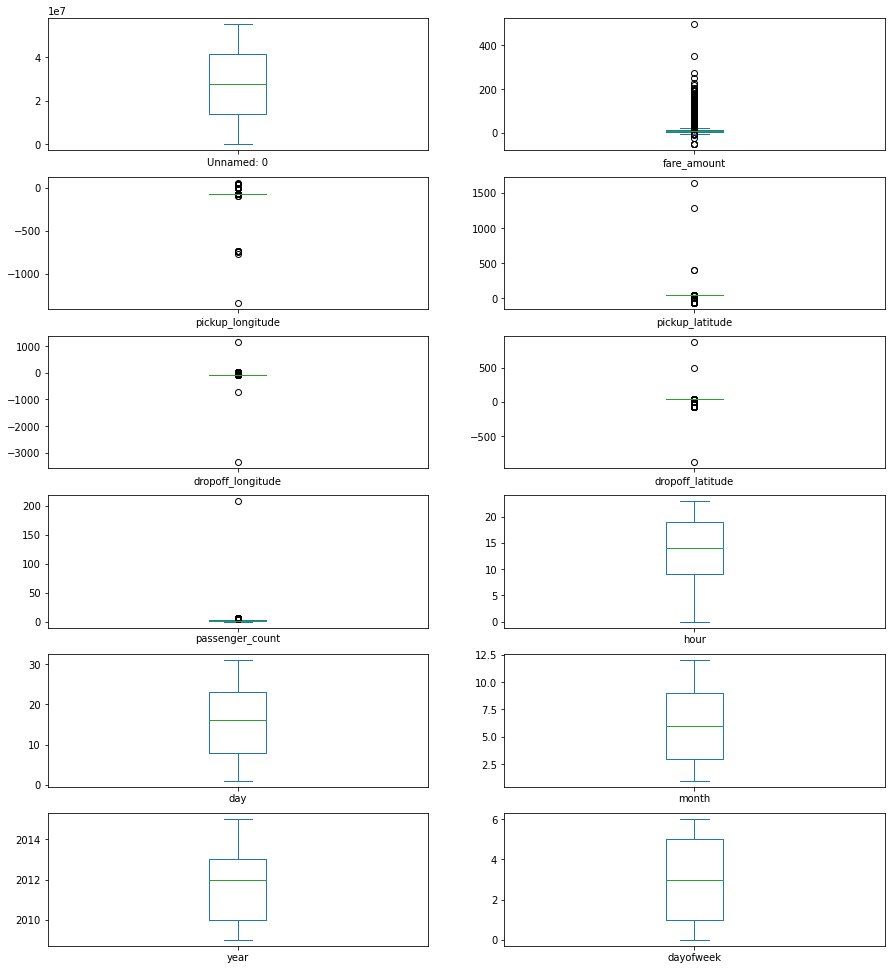

In [26]:
df.plot(kind='box',subplots=True,layout=(7,2),figsize=(15,20))

In [27]:
def remove_outlier(df1 , col):
    Q1 = df1[col].quantile(0.25)
    Q3 = df1[col].quantile(0.75)
    IQR = Q3 - Q1
    lower_whisker = Q1-1.5*IQR
    upper_whisker = Q3+1.5*IQR
    df[col] = np.clip(df1[col] , lower_whisker , upper_whisker)
    return df1

def treat_outliers_all(df1 , col_list):
    for c in col_list:
        df1 = remove_outlier(df , c)
    return df1

Unnamed: 0              AxesSubplot(0.125,0.787927;0.352273x0.0920732)
fare_amount          AxesSubplot(0.547727,0.787927;0.352273x0.0920732)
pickup_longitude        AxesSubplot(0.125,0.677439;0.352273x0.0920732)
pickup_latitude      AxesSubplot(0.547727,0.677439;0.352273x0.0920732)
dropoff_longitude       AxesSubplot(0.125,0.566951;0.352273x0.0920732)
dropoff_latitude     AxesSubplot(0.547727,0.566951;0.352273x0.0920732)
passenger_count         AxesSubplot(0.125,0.456463;0.352273x0.0920732)
hour                 AxesSubplot(0.547727,0.456463;0.352273x0.0920732)
day                     AxesSubplot(0.125,0.345976;0.352273x0.0920732)
month                AxesSubplot(0.547727,0.345976;0.352273x0.0920732)
year                    AxesSubplot(0.125,0.235488;0.352273x0.0920732)
dayofweek            AxesSubplot(0.547727,0.235488;0.352273x0.0920732)
dtype: object

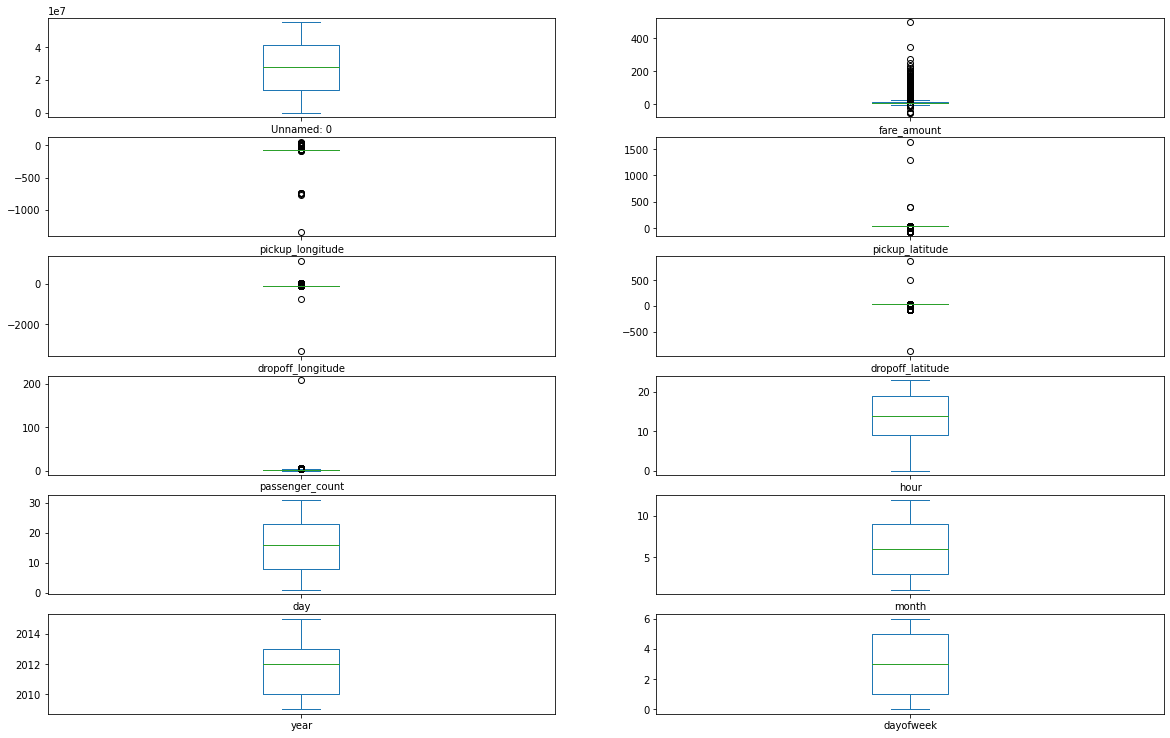

In [31]:
df.plot(kind='box',subplots='True',layout=(7,2),figsize=(20,15))

In [32]:
df.describe()

,Unnamed: 0,fare_amount,pickup_longitude,pickup_latitude,dropoff_longitude,dropoff_latitude,passenger_count,hour,day,month,year,dayofweek
count,2.000000e+05,200000.000000,200000.000000,200000.000000,200000.000000,200000.000000,200000.000000,200000.000000,200000.000000,200000.000000,200000.000000,200000.000000
mean,2.771250e+07,11.359955,-72.527638,39.935885,-72.525292,39.923890,1.684535,13.491335,15.704670,6.281795,2011.742440,3.048425
std,1.601382e+07,9.901776,11.437787,7.720539,13.117375,6.794812,1.385997,6.515531,8.687409,3.438925,1.856397,1.946946
min,1.000000e+00,-52.000000,-1340.648410,-74.015515,-3356.666300,-881.985513,0.000000,0.000000,1.000000,1.000000,2009.000000,0.000000
25%,1.382535e+07,6.000000,-73.992065,40.734796,-73.991407,40.733823,1.000000,9.000000,8.000000,3.000000,2010.000000,1.000000
50%,2.774550e+07,8.500000,-73.981823,40.752592,-73.980093,40.753042,1.000000,14.000000,16.000000,6.000000,2012.000000,3.000000
75%,4.155530e+07,12.500000,-73.967153,40.767158,-73.963658,40.768001,2.000000,19.000000,23.000000,9.000000,2013.000000,5.000000
max,5.542357e+07,499.000000,57.418457,1644.421482,1153.572603,872.697628,208.000000,23.000000,31.000000,12.000000,2015.000000,6.000000


In [33]:
from sklearn.model_selection import train_test_split

In [39]:
x = df[['pickup_longitude','pickup_latitude','dropoff_longitude','dropoff_latitude','passenger_count','hour','day','month','year','dayofweek']]
y = df['fare_amount']

In [40]:
X_train,X_test,y_train,y_test = train_test_split(x,y,test_size=0.33)

In [41]:
from sklearn.linear_model import LinearRegression
regression=LinearRegression()

In [43]:
regression.fit(X_train,y_train)

LinearRegression()

In [44]:
regression.intercept_

-1314.054653040138

In [45]:
regression.coef_

array([ 0.00202704,  0.00388053, -0.00373305, -0.0195871 ,  0.04758586,
       -0.02972526,  0.00427077,  0.10919368,  0.65884766,  0.02383092])

In [49]:
prediction=regression.predict(X_test)

In [50]:
print(prediction)

[11.69862505 10.13849927 11.21482976 ... 10.62787686 12.68050814
 12.51728512]


In [51]:
y_test

33967      6.0
27530      5.3
84173      4.9
109017    11.5
11715      8.1
          ... 
127251    15.3
165037     8.9
15741     13.7
124133     4.5
189515    11.0
Name: fare_amount, Length: 66000, dtype: float64